In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm

In [47]:
df = pd.read_csv('Kerala-Rainfall-Historical.csv')
print(df.shape)
df.head()

(117, 19)


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Kerala,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1
1,Kerala,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2
2,Kerala,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1
3,Kerala,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3
4,Kerala,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1


In [48]:
df_month = df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
df_season = df[['YEAR', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND']]

In [49]:
data = df.copy(deep=True)

df_trend = pd.melt(data, id_vars = ['YEAR'], 
                   value_vars = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                                 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC'], 
                   var_name='month', value_name='mms')
print(df_trend.shape)
df_trend.head()

(1404, 3)


,YEAR,month,mms
0,1901,JAN,28.7
1,1902,JAN,6.7
2,1903,JAN,3.2
3,1904,JAN,23.7
4,1905,JAN,1.2


In [50]:
df_trend['date'] = df_trend['YEAR'].astype('str') + '-' + df_trend['month'] + '-01'
df_trend['date']= pd.to_datetime(df_trend['date'])
df_sorted = df_trend.sort_values('date')

df_sorted = df_sorted.reset_index()
df_sorted = df_sorted.drop('index', axis=1)
df_sorted['month_no'] = df_sorted['date'].dt.strftime('%m')
month_int = df_sorted.loc[:, 'month_no'].astype('int')
df_sorted = df_sorted.assign(month_no = month_int)

annual_list, jf_list, mam_list, jjas_list, ond_list = [], [], [], [], []

for year in range(1901, 2018):
    ann = df.loc[df['YEAR']==year, 'ANNUAL']
    jf = df.loc[df['YEAR']==year, 'JF']
    mam = df.loc[df['YEAR']==year, 'MAM']
    jjas = df.loc[df['YEAR']==year, 'JJAS']
    ond = df.loc[df['YEAR']==year, 'OND']
    for year_loop in range(12):
        annual_list.append(float(ann))
        jf_list.append(float(jf))
        mam_list.append(float(mam))
        jjas_list.append(float(jjas))
        ond_list.append(float(ond))

df_sorted = df_sorted.assign(annual=annual_list)
df_sorted = df_sorted.assign(jf=jf_list)
df_sorted = df_sorted.assign(mam=mam_list)
df_sorted = df_sorted.assign(jjas=jjas_list)
df_sorted = df_sorted.assign(ond=ond_list)
df_sorted

,YEAR,month,mms,date,month_no,annual,jf,mam,jjas,ond
0,1901,JAN,28.7,1901-01-01,1,3248.6,73.4,386.2,2122.8,666.1
1,1901,FEB,44.7,1901-02-01,2,3248.6,73.4,386.2,2122.8,666.1
2,1901,MAR,51.6,1901-03-01,3,3248.6,73.4,386.2,2122.8,666.1
3,1901,APR,160.0,1901-04-01,4,3248.6,73.4,386.2,2122.8,666.1
4,1901,MAY,174.7,1901-05-01,5,3248.6,73.4,386.2,2122.8,666.1
...,...,...,...,...,...,...,...,...,...,...
1399,2017,AUG,462.6,2017-08-01,8,2664.9,13.0,353.9,1856.5,441.5
1400,2017,SEP,435.5,2017-09-01,9,2664.9,13.0,353.9,1856.5,441.5
1401,2017,OCT,228.0,2017-10-01,10,2664.9,13.0,353.9,1856.5,441.5
1402,2017,NOV,152.1,2017-11-01,11,2664.9,13.0,353.9,1856.5,441.5


In [51]:
for index in range(len(df_sorted)-11):
    df_sorted.loc[index+11, 'mov_avg'] = df_sorted[index:index+12]['mms'].mean()
df_sorted.head(16)

,YEAR,month,mms,date,month_no,annual,jf,mam,jjas,ond,mov_avg
0,1901,JAN,28.7,1901-01-01,1,3248.6,73.4,386.2,2122.8,666.1,NaN
1,1901,FEB,44.7,1901-02-01,2,3248.6,73.4,386.2,2122.8,666.1,NaN
2,1901,MAR,51.6,1901-03-01,3,3248.6,73.4,386.2,2122.8,666.1,NaN
3,1901,APR,160.0,1901-04-01,4,3248.6,73.4,386.2,2122.8,666.1,NaN
4,1901,MAY,174.7,1901-05-01,5,3248.6,73.4,386.2,2122.8,666.1,NaN
5,1901,JUN,824.6,1901-06-01,6,3248.6,73.4,386.2,2122.8,666.1,NaN
6,1901,JUL,743.0,1901-07-01,7,3248.6,73.4,386.2,2122.8,666.1,NaN
7,1901,AUG,357.5,1901-08-01,8,3248.6,73.4,386.2,2122.8,666.1,NaN
8,1901,SEP,197.7,1901-09-01,9,3248.6,73.4,386.2,2122.8,666.1,NaN
9,1901,OCT,266.9,1901-10-01,10,3248.6,73.4,386.2,2122.8,666.1,NaN


In [52]:
# calculate the seasonal factors for every month
df_sorted['ratio_ma'] = df_sorted['mms'] / df_sorted['mov_avg']
df_sorted

,YEAR,month,mms,date,month_no,annual,jf,mam,jjas,ond,mov_avg,ratio_ma
0,1901,JAN,28.7,1901-01-01,1,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN
1,1901,FEB,44.7,1901-02-01,2,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN
2,1901,MAR,51.6,1901-03-01,3,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN
3,1901,APR,160.0,1901-04-01,4,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN
4,1901,MAY,174.7,1901-05-01,5,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2017,AUG,462.6,2017-08-01,8,2664.9,13.0,353.9,1856.5,441.5,171.408333,2.698819
1400,2017,SEP,435.5,2017-09-01,9,2664.9,13.0,353.9,1856.5,441.5,200.691667,2.169995
1401,2017,OCT,228.0,2017-10-01,10,2664.9,13.0,353.9,1856.5,441.5,210.933333,1.080910
1402,2017,NOV,152.1,2017-11-01,11,2664.9,13.0,353.9,1856.5,441.5,218.783333,0.695208


In [53]:
# get the average seasonal factors to fit back into the months
for month in range(12):
    rate_avg = df_sorted.loc[df_sorted['month_no'].astype('int') == month+1, 'ratio_ma'].mean()
    df_sorted.loc[df_sorted['month_no'].astype('int') == month+1, 'rate'] = rate_avg
df_sorted

,YEAR,month,mms,date,month_no,annual,jf,mam,jjas,ond,mov_avg,ratio_ma,rate
0,1901,JAN,28.7,1901-01-01,1,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.049417
1,1901,FEB,44.7,1901-02-01,2,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.062845
2,1901,MAR,51.6,1901-03-01,3,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.154157
3,1901,APR,160.0,1901-04-01,4,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.453575
4,1901,MAY,174.7,1901-05-01,5,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.930244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2017,AUG,462.6,2017-08-01,8,2664.9,13.0,353.9,1856.5,441.5,171.408333,2.698819,1.738357
1400,2017,SEP,435.5,2017-09-01,9,2664.9,13.0,353.9,1856.5,441.5,200.691667,2.169995,1.009300
1401,2017,OCT,228.0,2017-10-01,10,2664.9,13.0,353.9,1856.5,441.5,210.933333,1.080910,1.216487
1402,2017,NOV,152.1,2017-11-01,11,2664.9,13.0,353.9,1856.5,441.5,218.783333,0.695208,0.669488


In [54]:
# use the average factors to get deseasonalized numbers
df_sorted['deseasonal'] = df_sorted['mms'] / df_sorted['rate']
df_sorted.head(16)

,YEAR,month,mms,date,month_no,annual,jf,mam,jjas,ond,mov_avg,ratio_ma,rate,deseasonal
0,1901,JAN,28.7,1901-01-01,1,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.049417,580.776307
1,1901,FEB,44.7,1901-02-01,2,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.062845,711.271572
2,1901,MAR,51.6,1901-03-01,3,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.154157,334.723229
3,1901,APR,160.0,1901-04-01,4,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.453575,352.753471
4,1901,MAY,174.7,1901-05-01,5,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.930244,187.800126
5,1901,JUN,824.6,1901-06-01,6,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,2.694557,306.024385
6,1901,JUL,743.0,1901-07-01,7,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,2.847874,260.896381
7,1901,AUG,357.5,1901-08-01,8,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,1.738357,205.653905
8,1901,SEP,197.7,1901-09-01,9,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,1.009300,195.878426
9,1901,OCT,266.9,1901-10-01,10,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,1.216487,219.402349


In [55]:
df_sorted['period'] = df_sorted.index + 1

X_train = df_sorted['period']
y_train = df_sorted['mms']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Original Rainfall')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)

Original Rainfall
Intercept: 257.92735438711924, Coefficient: -0.021455734565719836
R-Squared: 0.0011508387916198126


In [56]:
X_train = df_sorted['period']
y_train = df_sorted['deseasonal']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Deseasonalized Rainfall')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)
print(olsreg.summary())

Deseasonalized Rainfall
Intercept: 264.4360132473951, Coefficient: -0.0307920960935075
R-Squared: 0.005512372162586376
                            OLS Regression Results                            
Dep. Variable:             deseasonal   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.771
Date:                Sat, 20 Nov 2021   Prob (F-statistic):            0.00538
Time:                        13:31:00   Log-Likelihood:                -9183.1
No. Observations:                1404   AIC:                         1.837e+04
Df Residuals:                    1402   BIC:                         1.838e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

Comparing the R-squared number of the original model to the deseasonalized model, the improvement only increases from 0.001 to 0.006. The optimized regression can only explain 0.6% of variables, which is very bad. Thus, the next step is to try another way to optimize this prediction model.

### 4.1.2  Optimize The Model by 4 Seasons

In [57]:
def get_mov_avg(df, column, period, add_column):
    df[add_column] = df[column].rolling(period).mean()
    return df

season_list = ['JF', 'MAM', 'JJAS', 'OND']
df_season = pd.melt(data, id_vars = ['YEAR'], 
                   value_vars = season_list, 
                   var_name='season', value_name='q_mms')

for i in range(len(season_list)):
    df_season.loc[df_season['season']==season_list[i], 'season_no'] = i+1

df_season['season_no'] = df_season['season_no'].astype('int').astype('str')
df_season['year_s'] = df_season['YEAR'].astype('str')+'-'+'s'+df_season['season_no']
season_sorted = df_season.sort_values('year_s').reset_index(drop=True)

get_mov_avg(season_sorted, 'q_mms', 4, 'mov_avg')

season_sorted['ratio_s'] = season_sorted['q_mms'] / season_sorted['mov_avg']

for season in range(4):
    rate_avg = season_sorted.loc[season_sorted['season_no'].astype('int') == season+1, 'ratio_s'].mean()
    season_sorted.loc[season_sorted['season_no'].astype('int') == season+1, 'rate'] = rate_avg

season_sorted['deseasonal'] = season_sorted['q_mms'] / season_sorted['rate']

season_sorted['period'] = season_sorted.index+1

season_sorted

,YEAR,season,q_mms,season_no,year_s,mov_avg,ratio_s,rate,deseasonal,period
0,1901,JF,73.4,1,1901-s1,NaN,NaN,0.037439,1960.515942,1
1,1901,MAM,386.2,2,1901-s2,NaN,NaN,0.513478,752.125969,2
2,1901,JJAS,2122.8,3,1901-s3,NaN,NaN,2.759032,769.400333,3
3,1901,OND,666.1,4,1901-s4,812.125,0.820194,0.685043,972.348395,4
4,1902,JF,9.3,1,1902-s1,796.100,0.011682,0.037439,248.403246,5
...,...,...,...,...,...,...,...,...,...,...
463,2016,OND,185.0,4,2016-s4,467.700,0.395553,0.685043,270.056227,464
464,2017,JF,13.0,1,2017-s1,466.125,0.027890,0.037439,347.230344,465
465,2017,MAM,353.9,2,2017-s2,476.050,0.743409,0.513478,689.221596,466
466,2017,JJAS,1856.5,3,2017-s3,602.100,3.083375,2.759032,672.880968,467


In [58]:
X_train = season_sorted['period']
y_train = season_sorted['q_mms']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Original Rainfall Optimized by 4 Seasons')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)

Original Rainfall Optimized by 4 Seasons
Intercept: 771.4829059829059, Coefficient: -0.18305177409655068
R-Squared: 0.0009721950560945825


In [59]:
X_train = season_sorted['period']
y_train = season_sorted['deseasonal']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Deseasonized Rainfall Optimized by 4 Seasons')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)
print(olsreg.summary())

Deseasonized Rainfall Optimized by 4 Seasons
Intercept: 805.9389988267619, Coefficient: -0.32245283341099507
R-Squared: 0.015479852780417303
                            OLS Regression Results                            
Dep. Variable:             deseasonal   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     7.327
Date:                Sat, 20 Nov 2021   Prob (F-statistic):            0.00704
Time:                        13:31:02   Log-Likelihood:                -3402.1
No. Observations:                 468   AIC:                             6808.
Df Residuals:                     466   BIC:                             6817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

In [60]:
df_last = df_sorted[df_sorted['YEAR']!=1901]

annual_list_last, jf_list_last, mam_list_last, jjas_list_last, ond_list_last = [], [], [], [], []

for year in range(1901, 2017):
    ann_last = df.loc[df['YEAR']==year, 'ANNUAL']
    jf_last = df.loc[df['YEAR']==year, 'JF']
    mam_last = df.loc[df['YEAR']==year, 'MAM']
    jjas_last = df.loc[df['YEAR']==year, 'JJAS']
    ond_last = df.loc[df['YEAR']==year, 'OND']
    for year_loop in range(12):
        annual_list_last.append(float(ann_last))
        jf_list_last.append(float(jf_last))
        mam_list_last.append(float(mam_last))
        jjas_list_last.append(float(jjas_last))
        ond_list_last.append(float(ond_last))

df_last = df_last.assign(last_annual=annual_list_last)
df_last = df_last.assign(last_jf=jf_list_last)
df_last = df_last.assign(last_mam=mam_list_last)
df_last = df_last.assign(last_jjas=jjas_list_last)
df_last = df_last.assign(last_ond=ond_list_last)

df_ml = df_last[['YEAR', 'mms', 'month_no', 'mov_avg', 'last_annual', 
                 'last_jf', 'last_mam', 'last_jjas', 'last_ond']]
df_ml = df_ml.reset_index(drop=True)
df_ml

,YEAR,mms,month_no,mov_avg,last_annual,last_jf,last_mam,last_jjas,last_ond
0,1902,6.7,1,268.883333,3248.6,73.4,386.2,2122.8,666.1
1,1902,2.6,2,265.375000,3248.6,73.4,386.2,2122.8,666.1
2,1902,57.3,3,265.850000,3248.6,73.4,386.2,2122.8,666.1
3,1902,83.9,4,259.508333,3248.6,73.4,386.2,2122.8,666.1
4,1902,134.5,5,256.158333,3248.6,73.4,386.2,2122.8,666.1
...,...,...,...,...,...,...,...,...,...
1387,2017,462.6,8,171.408333,1870.9,19.3,314.2,1352.3,185.0
1388,2017,435.5,9,200.691667,1870.9,19.3,314.2,1352.3,185.0
1389,2017,228.0,10,210.933333,1870.9,19.3,314.2,1352.3,185.0
1390,2017,152.1,11,218.783333,1870.9,19.3,314.2,1352.3,185.0


In [61]:
# label the rainfall records into 4 ranges
df_ml['mms_level']=pd.qcut(df_ml['mms'].rank(method='first'), q=4, labels=range(1,5))
print('Level 4 - Above 75%: Above {} mms'.format(df_ml['mms'].quantile(q = 0.75)))
print('Level 3 - 75%-50%: {} - {} mms'.format(df_ml['mms'].quantile(q = 0.75), df_ml['mms'].quantile(q = 0.5)))
print('Level 2 - 50%-25%: {} - {} mms'.format(df_ml['mms'].quantile(q = 0.5), df_ml['mms'].quantile(q = 0.25)))
print('Level 1 - Below 25%: Below {} mms'.format(df_ml['mms'].quantile(q = 0.25)))
df_ml

Level 4 - Above 75%: Above 374.4 mms
Level 3 - 75%-50%: 374.4 - 152.55 mms
Level 2 - 50%-25%: 152.55 - 33.75 mms
Level 1 - Below 25%: Below 33.75 mms


,YEAR,mms,month_no,mov_avg,last_annual,last_jf,last_mam,last_jjas,last_ond,mms_level
0,1902,6.7,1,268.883333,3248.6,73.4,386.2,2122.8,666.1,1
1,1902,2.6,2,265.375000,3248.6,73.4,386.2,2122.8,666.1,1
2,1902,57.3,3,265.850000,3248.6,73.4,386.2,2122.8,666.1,2
3,1902,83.9,4,259.508333,3248.6,73.4,386.2,2122.8,666.1,2
4,1902,134.5,5,256.158333,3248.6,73.4,386.2,2122.8,666.1,2
...,...,...,...,...,...,...,...,...,...,...
1387,2017,462.6,8,171.408333,1870.9,19.3,314.2,1352.3,185.0,4
1388,2017,435.5,9,200.691667,1870.9,19.3,314.2,1352.3,185.0,4
1389,2017,228.0,10,210.933333,1870.9,19.3,314.2,1352.3,185.0,3
1390,2017,152.1,11,218.783333,1870.9,19.3,314.2,1352.3,185.0,2


In [62]:
# import machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
def run_multiclass(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    c_matrix = confusion_matrix(y_test, y_pred)
    c_report = classification_report(y_test, y_pred, digits=5)
    
    print(classification_report(y_test, y_pred, digits=5))
    
    return model, accuracy, c_matrix, c_report

In [64]:
X = df_ml.drop(['mms', 'mms_level'], axis=1)
y = df_ml['mms_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

# GaussianNB
print('GaussianNB:')
params_gnb = {'var_smoothing': 1e-09}
model_gnb = GaussianNB(**params_gnb)
model_gnb, accuracy_gnb, c_matrix_gnb, c_report_gnb = run_multiclass(model_gnb, X_train, y_train, X_test, y_test)

# Random Forest
print('Random Forest:')
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 44}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, c_matrix_rf, c_report_rf = run_multiclass(model_rf, X_train, y_train, X_test, y_test)

# Logistic Regression
print('Logistic Regression:')
params_lr = {'penalty': 'l1', 'solver':'liblinear', 
             'random_state': 44}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, c_matrix_lr, c_report_lr = run_multiclass(model_lr, X_train, y_train, X_test, y_test)

# Decision Tree
print('Decision Tree:')
params_dt = {'max_depth': 16,
             'max_features': "sqrt", 'random_state': 44}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, c_matrix_dt, c_report_dt = run_multiclass(model_dt, X_train, y_train, X_test, y_test)

GaussianNB:
              precision    recall  f1-score   support

           1    0.67257   0.80000   0.73077        95
           2    0.47222   0.20238   0.28333        84
           3    0.53782   0.72727   0.61836        88
           4    0.81250   0.80247   0.80745        81

    accuracy                        0.63793       348
   macro avg    0.62378   0.63303   0.60998       348
weighted avg    0.62270   0.63793   0.61219       348

Random Forest:
              precision    recall  f1-score   support

           1    0.82927   0.71579   0.76836        95
           2    0.48193   0.47619   0.47904        84
           3    0.54255   0.57955   0.56044        88
           4    0.74157   0.81481   0.77647        81

    accuracy                        0.64655       348
   macro avg    0.64883   0.64659   0.64608       348
weighted avg    0.65251   0.64655   0.64784       348

Logistic Regression:
              precision    recall  f1-score   support

           1    0.58209   0

In [65]:
bar_x = ['GaussianNB', 'Random Forest', 'Logistic Regression', 
     'Decision Tree'] 
bar_y = [accuracy_gnb, accuracy_rf, accuracy_lr, accuracy_dt]
rounded_y = [round(num, 4) for num in bar_y]

fig = px.bar(x=bar_x, y=bar_y, text=rounded_y, title='Accuracy Comparison between Models',
             color=rounded_y, color_continuous_scale='bupu',
             labels={'x':'Machine Learning Models', 'y':'Accuracy Score'}, height=500)
fig.update_layout(title_x=0.5)
fig.show()

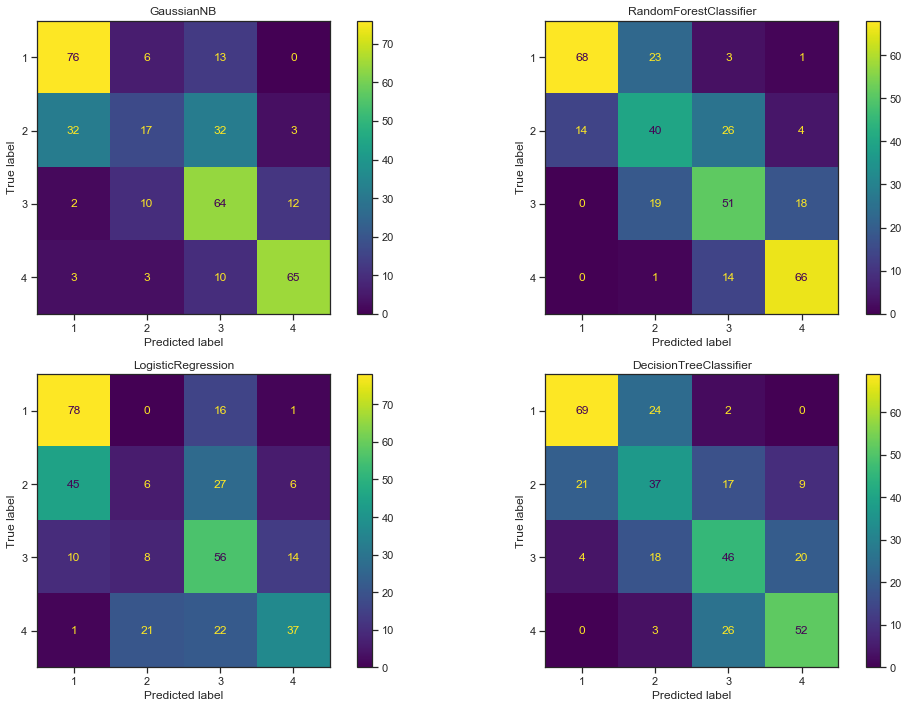

In [66]:
classifiers = [model_gnb, model_rf, model_lr, model_dt]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

plt.style.use('seaborn-white') 
sns.set_context("notebook")
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls,X_test,y_test,ax=ax)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [67]:
# calculate the false predictions that accurately forecast droughts and floods
model_list = [c_matrix_gnb, c_matrix_rf, c_matrix_lr, c_matrix_dt]

f_drought_list = []
f_flood_list = []
for matrix in model_list:
    f_to_drought = round(matrix[0, 1:4].sum() / matrix[:, 1:4].sum(), 2)
    f_to_flood = round(matrix[3, :3].sum() / matrix[:, :3].sum(), 2)
    f_drought_list.append(f_to_drought)
    f_flood_list.append(f_to_flood)

In [68]:
fig = go.Figure()
fig.add_trace(go.Bar(x=f_drought_list, y=bar_x, name='False Prediction of Droughts', 
                     marker_color='lightgrey', text=f_drought_list, 
                     textposition='auto', orientation='h'))
fig.add_trace(go.Bar(x=f_flood_list, y=bar_x, name='False Prediction of Floods', 
                     marker_color='lightsalmon', text=f_flood_list, 
                     textposition='auto', orientation='h'))
fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.update_layout({'showlegend':True, 
                   'legend':{'x':0.7, 'y':0.94, 
                             'bgcolor':'rgb(246, 228, 129)'}})
fig.update_xaxes(
        title_text = "Machine Learning Models",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "False Prediction Rate",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_layout(title_text="False Prediction of Droughts and Floods (The Lower, The Better)", title_x=0.5, title_y=0.88)
fig.show()